In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [13]:
data= pd.read_csv('australia covid.csv')

FileNotFoundError: [Errno 2] File australia covid.csv does not exist: 'australia covid.csv'

In [11]:
data

NameError: name 'data' is not defined

In [12]:
data.describe().T

NameError: name 'data' is not defined

In [357]:
data.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [358]:
data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [359]:
recover=[]
for i in data.Recovered:
    if i==0:
        recover.append(0)
    else:
        recover.append(1)
        

In [360]:
data['Recover']=recover

In [361]:
x=data['Recover'].value_counts()

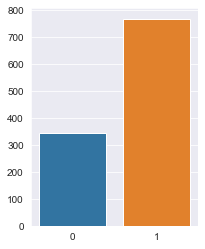

In [362]:
plt.figure(figsize=(3,4))
sns.barplot(data=data, x=x.index, y=x.values)
sns.set_style('darkgrid')
plt.show()

In [363]:
data.Recover.value_counts()

1    769
0    343
Name: Recover, dtype: int64

In [364]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Recover
0,Australian Capital Territory,Australia,-35.4735,149.0124,22-01-2020,0,0,0,0,Western Pacific,0
1,New South Wales,Australia,-33.8688,151.2093,22-01-2020,0,0,0,0,Western Pacific,0
2,Northern Territory,Australia,-12.4634,130.8456,22-01-2020,0,0,0,0,Western Pacific,0
3,Queensland,Australia,-28.0167,153.4000,22-01-2020,0,0,0,0,Western Pacific,0
4,South Australia,Australia,-34.9285,138.6007,22-01-2020,0,0,0,0,Western Pacific,0
...,...,...,...,...,...,...,...,...,...,...,...
1107,Queensland,Australia,-28.0167,153.4000,08-06-2020,1062,6,1051,5,Western Pacific,1
1108,South Australia,Australia,-34.9285,138.6007,08-06-2020,440,4,436,0,Western Pacific,1
1109,Tasmania,Australia,-41.4545,145.9707,08-06-2020,228,13,209,6,Western Pacific,1
1110,Victoria,Australia,-37.8136,144.9631,08-06-2020,1687,19,1602,66,Western Pacific,1


### Resampling

In [365]:
from sklearn.utils import resample

In [366]:
data_recovered = data[data.Recover==1]
data_not_recovered = data[data.Recover==0]

In [367]:
data_nt_upsampled = resample(data_recovered, 
                                 replace=True,     # sample with replacement
                                 n_samples=343,    # to match majority class
                                 random_state=123)

In [368]:
data_upsampled = pd.concat([data_not_recovered,data_nt_upsampled])

In [369]:
data_upsampled.Recover.value_counts()

1    343
0    343
Name: Recover, dtype: int64

In [370]:
data_upsampled

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Recover
0,Australian Capital Territory,Australia,-35.4735,149.0124,22-01-2020,0,0,0,0,Western Pacific,0
1,New South Wales,Australia,-33.8688,151.2093,22-01-2020,0,0,0,0,Western Pacific,0
2,Northern Territory,Australia,-12.4634,130.8456,22-01-2020,0,0,0,0,Western Pacific,0
3,Queensland,Australia,-28.0167,153.4000,22-01-2020,0,0,0,0,Western Pacific,0
4,South Australia,Australia,-34.9285,138.6007,22-01-2020,0,0,0,0,Western Pacific,0
...,...,...,...,...,...,...,...,...,...,...,...
893,Tasmania,Australia,-41.4545,145.9707,12-05-2020,227,13,184,30,Western Pacific,1
697,New South Wales,Australia,-33.8688,151.2093,18-04-2020,2936,26,1379,1531,Western Pacific,1
862,Victoria,Australia,-37.8136,144.9631,08-05-2020,1468,18,1327,123,Western Pacific,1
961,New South Wales,Australia,-33.8688,151.2093,21-05-2020,3084,48,2648,388,Western Pacific,1


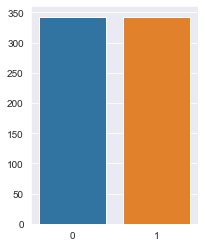

In [371]:
y=data_upsampled['Recover'].value_counts()
plt.figure(figsize=(3,4))
sns.barplot(data=data, x=y.index, y=y.values)
sns.set_style('darkgrid')
plt.show()

In [372]:
data_upsampled.drop(columns=['Province/State','Country/Region','Date','Recovered','WHO Region'],inplace=True)

In [373]:
data_upsampled

,Lat,Long,Confirmed,Deaths,Active,Recover
0,-35.4735,149.0124,0,0,0,0
1,-33.8688,151.2093,0,0,0,0
2,-12.4634,130.8456,0,0,0,0
3,-28.0167,153.4000,0,0,0,0
4,-34.9285,138.6007,0,0,0,0
...,...,...,...,...,...,...
893,-41.4545,145.9707,227,13,30,1
697,-33.8688,151.2093,2936,26,1531,1
862,-37.8136,144.9631,1468,18,123,1
961,-33.8688,151.2093,3084,48,388,1


In [374]:
X = data_upsampled[['Lat','Long','Confirmed','Deaths','Active']]
y=data_upsampled['Recover']

In [375]:
train_X, test_X, train_y, test_y = train_test_split(X,y,
                                                  test_size = 0.3, random_state=123)

In [376]:
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(train_X, train_y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [377]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       113
           1       0.94      0.98      0.96        93

    accuracy                           0.96       206
   macro avg       0.96      0.96      0.96       206
weighted avg       0.96      0.96      0.96       206



In [386]:
tuned_parameters = [{'n_neighbors': np.arange(1,9)}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=10,
                   scoring='accuracy')

In [387]:
knn_clf.fit(train_X, train_y )

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [388]:
knn_clf.best_score_

0.9833333333333333

In [389]:
knn_clf.best_params_

{'n_neighbors': 1}

In [390]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       113
           1       0.99      0.98      0.98        93

    accuracy                           0.99       206
   macro avg       0.99      0.98      0.99       206
weighted avg       0.99      0.99      0.99       206



In [391]:
knn_cm=metrics.confusion_matrix( test_y, knn_clf.predict( test_X ))
knn_cm

array([[112,   1],
       [  2,  91]], dtype=int64)

Text(0.5, 16.0, 'Predicted label')

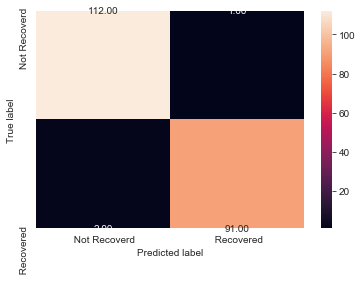

In [392]:
sns.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = [" Not Recoverd", " Recovered"] , yticklabels = ["Not Recoverd", " Recovered"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [385]:
print('Accuracy score:',metrics.accuracy_score( test_y, knn_clf.predict( test_X ) ))

Accuracy score: 0.9854368932038835
